In [ ]:
!pip install pulp

# PROGRAMACIÓN LINEAL. FORMULACIÓN Y RESOLUCIÓN GRÁFICA

En un taller metalúrgico se fabrican dos tipos de piezas A y B, que deben seguir los siguientes procesos:
1. Estampado en hojas metálicas
2. Soldado
3. Pintado


La operación de estampado consiste en preparar partes idénticas que luego serán soldadas de a pares, formando la pieza A. El mismo proceso se realiza para la pieza B.
Los insumos de equipos son los siguientes, para la realización de cada una de las operaciones
(expresados en segundos por pieza):

| Operación              | A  | B  | Tiempo disponible (seg./semana) |
|-------------------------|----|----|--------------------------------|
| Estampado de c/parte    | 3  | 8  | 48000                          |
| Soldado                 | 12 | 6  | 42000                          |
| Pintado                 | 9  | 9  | 36000                          |


La utilidad unitaria es de \$4 para la pieza A y \$3 para la pieza B. Se desea establecer el programa semanal de producción que maximice la utilidad del taller con respecto a las piezas consideradas.

In [ ]:
import pulp

# Crear el problema

Especificar que es de "Maximización"

In [ ]:

model = pulp.LpProblem("Problema_Estampado_Soldado_Pintado", pulp.LpMaximize)

In [ ]:
# Definir variables de decisión (continuas y ≥ 0)
x1 = pulp.LpVariable("x1", lowBound=0, cat='Continuous')
x2 = pulp.LpVariable("x2", lowBound=0, cat='Continuous')

In [ ]:
# Función objetivo
model += 4 * x1 + 3 * x2, "Z"

In [ ]:
# Agregar restricciones al modelo
model += 6 * x1 + 16 * x2 <= 48000, "Estampado"
model += 12 * x1 + 6 * x2 <= 42000, "Soldado"
model += 9 * x1 + 9 * x2 <= 36000, "Pintado"

In [ ]:
# Resolver
model.solve()

1

In [ ]:
# Resultados
print(f"Estado: {pulp.LpStatus[model.status]}")
print(f"x1 = {x1.varValue}")
print(f"x2 = {x2.varValue}")
print(f"Valor óptimo de Z = {pulp.value(model.objective)}")

Estado: Optimal
x1 = 3000.0
x2 = 1000.0
Valor óptimo de Z = 15000.0


# Resolución gráfica

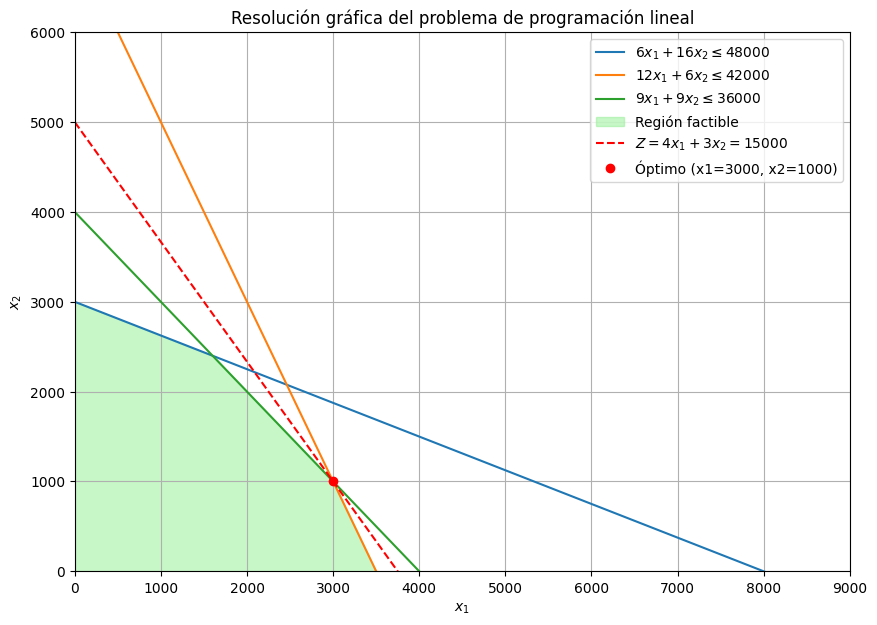

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Rango de valores para x1
x1_vals = np.linspace(0, 9000, 400)

# Definición de restricciones
r1 = (48000 - 6 * x1_vals) / 16   # Restricción 1: 6x1 + 16x2 <= 48000
r2 = (42000 - 12 * x1_vals) / 6   # Restricción 2: 12x1 + 6x2 <= 42000
r3 = (36000 - 9 * x1_vals) / 9    # Restricción 3: 9x1 + 9x2 <= 36000

# Graficar las restricciones
plt.figure(figsize=(10, 7))
plt.plot(x1_vals, r1, label=r'$6x_1 + 16x_2 \leq 48000$')
plt.plot(x1_vals, r2, label=r'$12x_1 + 6x_2 \leq 42000$')
plt.plot(x1_vals, r3, label=r'$9x_1 + 9x_2 \leq 36000$')

# Definir región factible
x2_vals = np.maximum(0, np.minimum(np.minimum(r1, r2), r3))
plt.fill_between(x1_vals, 0, x2_vals, where=(x2_vals >= 0), color='lightgreen', alpha=0.5, label='Región factible')

# Dibujar línea de nivel de la función objetivo Z = 4x1 + 3x2 = 15000
Z = lambda x1, x2: 4 * x1 + 3 * x2
z_opt = Z(3000, 1000)
x2_line = (z_opt - 4 * x1_vals) / 3
plt.plot(x1_vals, x2_line, 'r--', label=r'$Z = 4x_1 + 3x_2 = 15000$')

# Marcar el punto óptimo
plt.plot(3000, 1000, 'ro', label='Óptimo (x1=3000, x2=1000)')

# Configurar ejes
plt.xlim(0, 9000)
plt.ylim(0, 6000)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Resolución gráfica del problema de programación lineal')
plt.legend()
plt.grid(True)
plt.show()

El óptimo se encuentra al desplazar la pendiente del funcional (Z)

Solución: El punto que se encuentra más alejado.

x1 = 3000
x2 = 1000
Valor óptimo de Z = 15000